In [1]:
import os
import pickle
import scipy
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def dump_pickle(data, pickle_out):
    """
    Dumps pickle.
    """
    with open(pickle_out, "wb") as f:
        pickle.dump(data, f)

def load_pickle(pickle_in):
    """
    Loads pickle.
    """
    with open(pickle_in, "rb") as f:
        data = pickle.load(f)
    return data

In [3]:
wd = "."
input_id = "MtbKRS_XChem_hits"
in_dir = os.path.join(wd, "input", input_id)
out_dir = os.path.join(wd, "output", input_id)
results_dir = os.path.join(out_dir, "results")

In [4]:
ress_ss_dict = load_pickle(os.path.join(results_dir, '{}_ress_SS.pkl'.format(input_id)))                    # residue --> SS
ress_aa_dict = load_pickle(os.path.join(results_dir, '{}_ress_AA.pkl'.format(input_id)))                    # residue --> AA
ress_rsa_dict = load_pickle(os.path.join(results_dir, '{}_ress_RSA.pkl'.format(input_id)))                  # residue --> RSA
ress_bss_dict = load_pickle(os.path.join(results_dir, '{}_res_bss.pkl'.format(input_id)))                   # residue --> [binding sites]

lig_ress_dict = load_pickle(os.path.join(results_dir, '{}_lig_ress.pkl'.format(input_id)))                  # ligand --> [binding residues]
lig_inters_df = pd.read_pickle(os.path.join(results_dir, '{}_lig_inters.pkl'.format(input_id)))             # ligand interactions dataframe
lig_bs_dict = load_pickle(os.path.join(results_dir, '{}_lig_bs.pkl'.format(input_id)))                      # ligand --> binding site
lig_data_df = pd.read_pickle(os.path.join(results_dir, '{}_lig_data.pkl'.format(input_id)))                 # ligand dataframe

site_ress_dict = load_pickle(os.path.join(results_dir, '{}_site_ress.pkl'.format(input_id)))                # binding site --> [binding residues]
aa_profs_dict = load_pickle(os.path.join(results_dir, '{}_bss_AA_profiles.pkl'.format(input_id)))           # binding site --> [AA]
rsa_profs_dict = load_pickle(os.path.join(results_dir, '{}_bss_RSA_profiles.pkl'.format(input_id)))         # binding site --> [SS]
ss_profs_dict = load_pickle(os.path.join(results_dir, '{}_bss_SS_profiles.pkl'.format(input_id)))           # binding site --> [RSA]
rel_dist_df = pd.read_pickle(os.path.join(results_dir, '{}_rel_dist.pkl'.format(input_id)))                 # D = 1 - Irel matrix (DF)
bs_def_df = pd.read_pickle(os.path.join(results_dir, '{}_BS_def_average_i_rel_0.5.pkl'.format(input_id)))   # binding site definition
dssp_df = pd.read_pickle(os.path.join(results_dir, '{}_dssp_mapped.pkl'.format(input_id)))                  # DSSP dataframe
missense_df = pd.read_pickle(os.path.join(results_dir, '{}_missense_df.pkl'.format(input_id)))              # missense dataframe
consvar_df = pd.read_pickle(os.path.join(results_dir, '{}_ress_consvar.pkl'.format(input_id)))              # cons + var dataframe
results_df = pd.read_pickle(os.path.join(results_dir, '{}_results_table.pkl'.format(input_id)))             # final results table

#domains_file = os.path.join(results_dir, '{}_stamp.domains'.format(input_id))
#stamp_out = os.path.join(results_dir, '{}_stamp.out'.format(input_id))
#bs_attr = os.path.join(results_dir, '{}_BS_def_average_i_rel_0.5.attr'.format(input_id))
#bs_col_command = os.path.join(results_dir, '{}_BS_def_average_i_rel_0.5.com'.format(input_id))

## Residue level data

### Amino acid

In [5]:
print(len(ress_aa_dict))
for k, v in ress_aa_dict.items():
    print(k, v)
    break

475
11 P


### Relative Solvent Accessibility

In [6]:
print(len(ress_rsa_dict))
for k, v in ress_rsa_dict.items():
    print(k, v)
    break

475
11 93.92


### Secondary structure

In [7]:
print(len(ress_ss_dict))
for k, v in ress_ss_dict.items():
    print(k, v)
    break

475
11 C


### Binding site membership

In [8]:
print(len(ress_bss_dict)) # this will equal to the number of ligand binding residues
for k, v in ress_bss_dict.items():
    print(k, v)
    break

38
211 [1]


## Ligand level data

### Ligands

In [9]:
print(len(lig_data_df))
lig_data_df.head()

10


,struc_name,label_comp_id,label_asym_id,auth_seq_id
3665,MKRS-x0178-pandda-model_ALL.pdb,LIG,B,1
3665,MKRS-x0182-pandda-model_q1_ALL.pdb,LIG,B,1
3619,MKRS-x0154-pandda-model_ALL.pdb,LIG,B,1
3655,MKRS-x0007-pandda-model_ALL.pdb,LIG,B,1
3665,MKRS-x0231-pandda-model_ALL.pdb,LIG,B,1


### Ligand binding residues

In [10]:
print(len(lig_ress_dict))
for k, v in lig_ress_dict.items():
    print(k, v)
    break

10
MKRS-x0003-pandda-model_ALL_LIG_1_B [257, 265, 266, 267, 269, 271, 422, 423, 424, 425, 476, 481, 491, 505, 264, 477, 478]


### Ligand binding interactions

In [11]:
print(len(lig_inters_df))
lig_inters_df.head()

10


,pdb_id,lig_name,lig_resnum,lig_chain,binding_res,lab
0,MKRS-x0003-pandda-model_ALL,LIG,1,B,"[257, 265, 266, 267, 269, 271, 422, 423, 424, ...",MKRS-x0003-pandda-model_ALL_LIG_1_B
1,MKRS-x0007-pandda-model_ALL,LIG,1,B,"[211, 235, 239, 273, 275, 398, 399, 400, 401, ...",MKRS-x0007-pandda-model_ALL_LIG_1_B
2,MKRS-x0052-pandda-model_ALL,LIG,1,B,"[235, 239, 275, 397, 398, 399, 400, 401, 427, ...",MKRS-x0052-pandda-model_ALL_LIG_1_B
3,MKRS-x0093_q2_ALL,LIG,1,B,"[257, 265, 266, 269, 271, 422, 423, 424, 425, ...",MKRS-x0093_q2_ALL_LIG_1_B
4,MKRS-x0154-pandda-model_ALL,LIG,1,B,"[269, 422, 478, 480, 481, 484, 491, 421]",MKRS-x0154-pandda-model_ALL_LIG_1_B


### Ligand binding site membership

In [12]:
print(len(lig_bs_dict))
for k, v in lig_bs_dict.items():
    print(k, v)
    break

10
MKRS-x0003-pandda-model_ALL_LIG_1_B 0


## Binding site level data

### Residue numbers

In [13]:
print(len(site_ress_dict))
for k, v in site_ress_dict.items():
    print(k, v)
    break

2
0 [257, 264, 265, 266, 267, 268, 269, 270, 271, 415, 421, 422, 423, 424, 425, 476, 477, 478, 479, 480, 481, 484, 491, 505]


### AA profile

In [14]:
print(len(aa_profs_dict))
for k, v in aa_profs_dict.items():
    print(k, v)
    break

2
0 ['R', 'T', 'H', 'S', 'P', 'E', 'F', 'S', 'M', 'D', 'I', 'E', 'L', 'A', 'T', 'G', 'M', 'G', 'I', 'D', 'R', 'M', 'I', 'K']


### SS profile

In [15]:
print(len(ss_profs_dict))
for k, v in ss_profs_dict.items():
    print(k, v)
    break

2
0 ['C', 'T', 'B', 'C', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'H', 'H', 'H', 'H', 'H', 'C']


### RSA profile

In [16]:
print(len(rsa_profs_dict))
for k, v in rsa_profs_dict.items():
    print(k, v)
    break

2
0 [19.72, 36.9, 48.8, 23.0, 33.62, 48.88, 18.64, 6.29, 7.83, 3.51, 17.7, 41.85, 3.38, 3.6, 10.18, 5.52, 2.8, 12.12, 0.0, 4.02, 24.49, 13.64, 14.09, 11.92]


## Visualising ligand site definition

In [17]:
rel_dist_df.head(5)

,0,1,2,3,4,5,6,7,8,9
0,0.000,0.875,1.0,0.059,0.375,0.071,0.000,0.250,0.333,0.176
1,0.875,0.000,0.0,0.875,1.000,0.857,0.875,1.000,1.000,0.938
2,1.000,0.000,0.0,1.000,1.000,1.000,1.000,1.000,1.000,1.000
3,0.059,0.875,1.0,0.000,0.250,0.071,0.000,0.167,0.250,0.118
4,0.375,1.000,1.0,0.250,0.000,0.500,0.375,0.375,0.375,0.250


In [18]:
clust_method = "average"
clust_dist = 0.5
sample_colors = ["#e6194b", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe", "#008080", "#e6beff", "#9a6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1", "#000075", "#808080", "#ffffff", "#000000"]
sample_colors_dict = {i: sample_colors[i] for i in range(len(sample_colors))}
condensed_dist_mat = scipy.spatial.distance.squareform(rel_dist_df) # condensed distance matrix to be used for clustering
linkage = scipy.cluster.hierarchy.linkage(condensed_dist_mat, method = clust_method, optimal_ordering = True)
cut_tree = scipy.cluster.hierarchy.cut_tree(linkage, height = clust_dist)
cluster_ids = [int(cut) for cut in cut_tree]
labs = lig_inters_df.lab.tolist()
cluster_id_dict = {labs[i]: cluster_ids[i] for i in range(len(labs))} #dictionary indicating membership for each lig

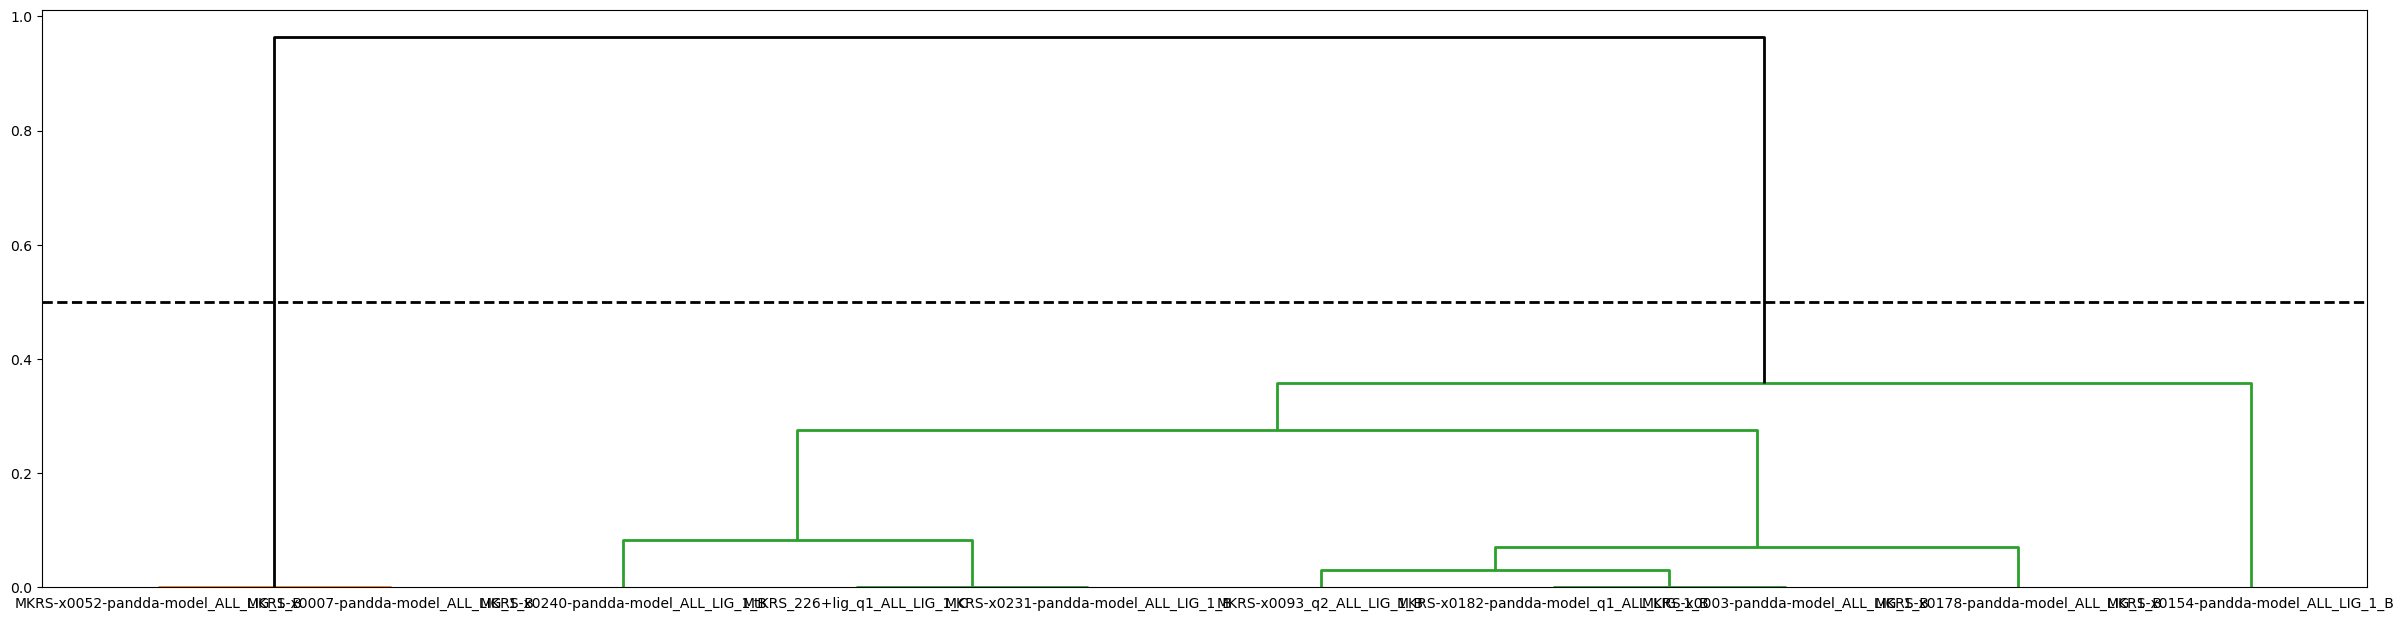

In [19]:
fig = plt.figure(figsize=(30, 7.5), dpi = 100)
matplotlib.rcParams['lines.linewidth'] = 2
dd = scipy.cluster.hierarchy.dendrogram(linkage, labels = labs, leaf_font_size = 10, color_threshold = clust_dist, above_threshold_color = "k")
# = [cluster_id_dict[d] for d in dd["ivl"]]
# = sorted(set(x), key=x.index)
#ols_list = [sample_colors[i] for i in x]
#cipy.cluster.hierarchy.set_link_color_palette(cols_list)

#[site_cluster_dict[k] for k in dd["ivl"]]
#if out != None:
#    plt.savefig(out)
    #print("Figure was successfully saved!")
#plt.ylim(0,20)
plt.axhline(y=clust_dist, c = "k", linestyle = "--")
#plt.ylim(-0.1)
plt.show()

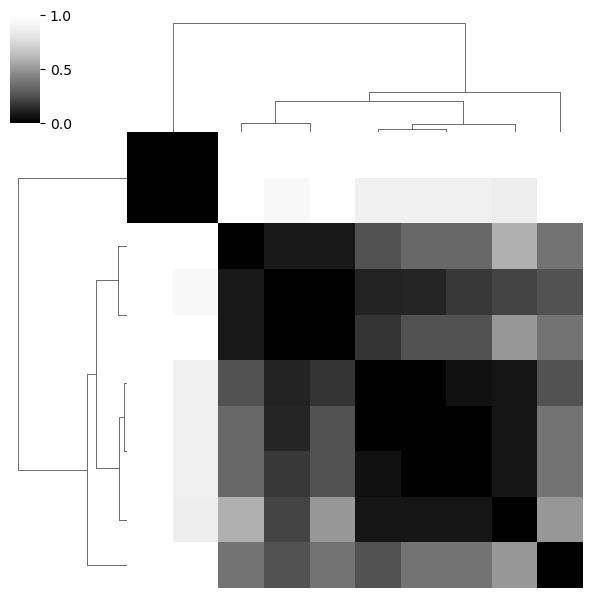

In [20]:
sns.clustermap(rel_dist_df, xticklabels = False, yticklabels = False, row_linkage=linkage, col_linkage=linkage, figsize=(6,6), cmap = "Greys_r")
#plt.savefig('./figs/fig_name.png', dpi = 600)
plt.show()

## Results table analysis

In [21]:
print("Minimum occupancy: {}".format(results_df.occ.min()))
print("Average occupancy: {}".format(round(results_df.occ.mean())))
print("Maximum occupancy: {}".format(results_df.occ.max()))

Minimum occupancy: 35
Average occupancy: 1371
Maximum occupancy: 1710


In [22]:
print("Minimum HUMAN occupancy: {}".format(results_df.human_occ.min()))
print("Average HUMAN occupancy: {}".format(round(results_df.human_occ.mean())))
print("Maximum HUMAN occupancy: {}".format(results_df.human_occ.max()))

Minimum HUMAN occupancy: 0
Average HUMAN occupancy: 4
Maximum HUMAN occupancy: 6


## Conservation & occupancy on target sequence (FULL MSA)

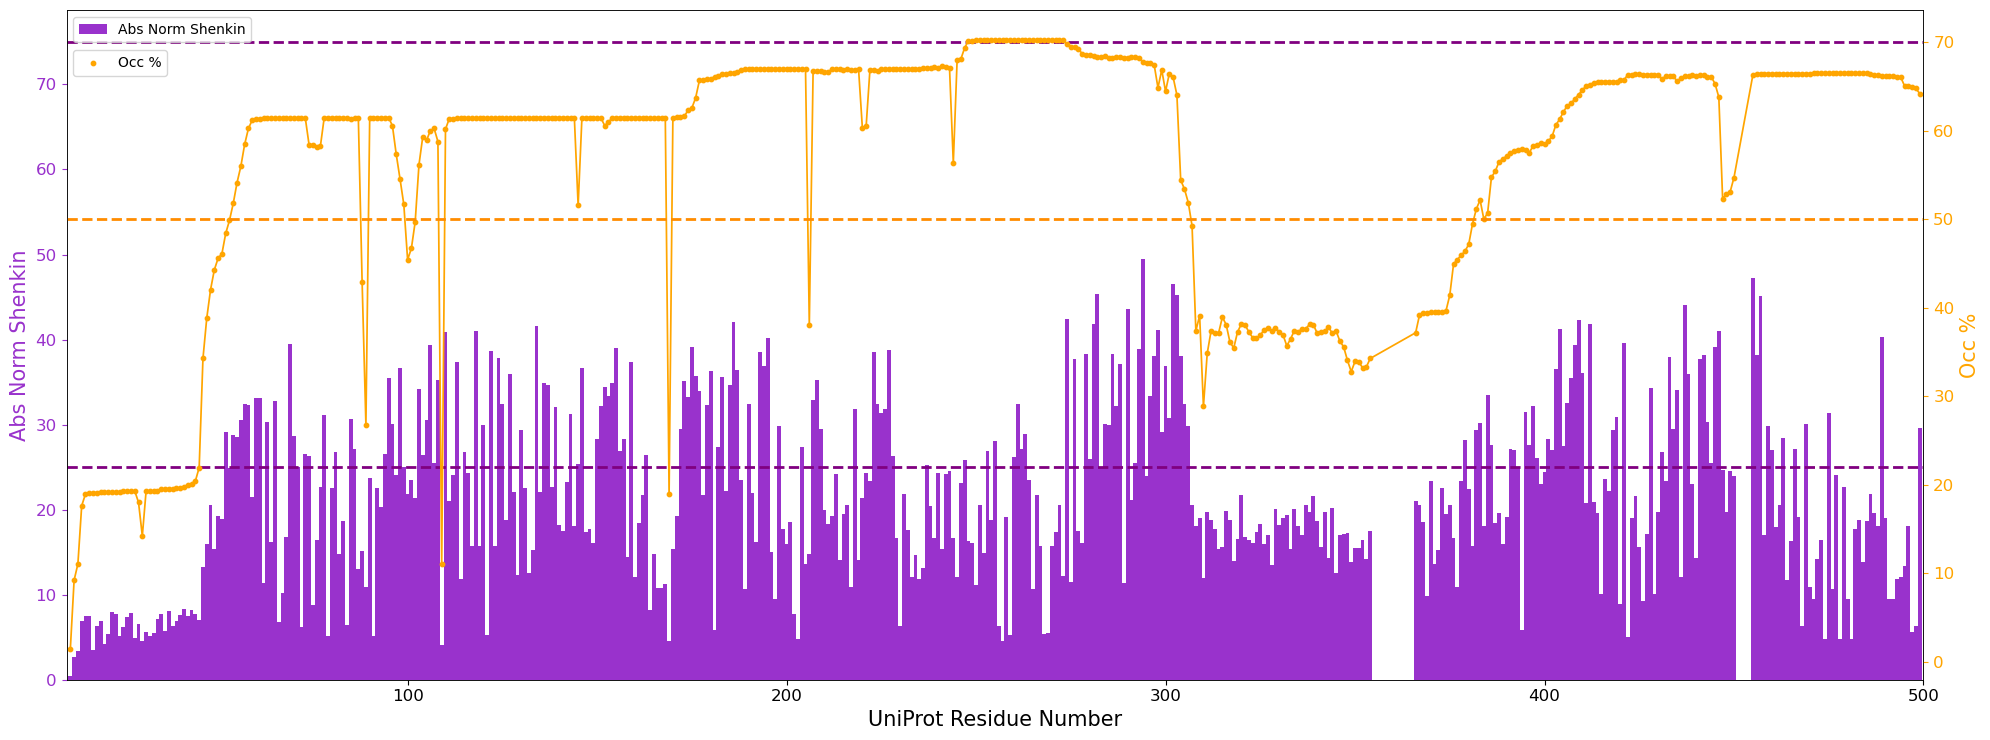

In [23]:
# Create the figure and the first axis (ax1)

plt.rcParams.update({"axes.linewidth": 0.5})

fig, ax1 = plt.subplots(figsize=(20, 7.5))

# Plot a barplot on ax1
ax1.bar(results_df['UniProt_ResNum'], results_df['abs_norm_shenkin'], color='darkorchid', label='Abs Norm Shenkin', width = 1)

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_xlabel('UniProt Residue Number', fontsize = 15)
ax1.set_ylabel('Abs Norm Shenkin', color='darkorchid', fontsize = 15)
ax1.tick_params('x', colors='k', labelsize=12)
ax1.tick_params('y', colors='darkorchid', labelsize=12)
ax1.axhline(y = 25, linestyle = '--', c = 'purple')
ax1.axhline(y = 75, linestyle = '--', c = 'purple')
# Create the second axis (ax2) based on the first axis (ax1)
ax2 = ax1.twinx()

# Plot a scatterplot + lineplot on ax2
ax2.scatter(results_df['UniProt_ResNum'], results_df['occ_pct'], color='orange', marker='o', label='Occ %', s = 10)
ax2.plot(results_df['UniProt_ResNum'], results_df['occ_pct'], color='orange', linewidth = 1.25)

# Make the y-axis label, ticks and tick labels match the line color.
ax2.set_ylabel('Occ %', color='orange', fontsize = 15)
ax2.tick_params('y', colors='orange', labelsize=12)
ax2.axhline(y = 50, linestyle = '--', c = 'darkorange')

plt.xlim(results_df.UniProt_ResNum.min() - 1, results_df.UniProt_ResNum.max() + 1)

# Create legends
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.95))

# Show the plot
fig.tight_layout()
plt.show()


## Conservation & occupancy on target sequence (HUMAN MSA)

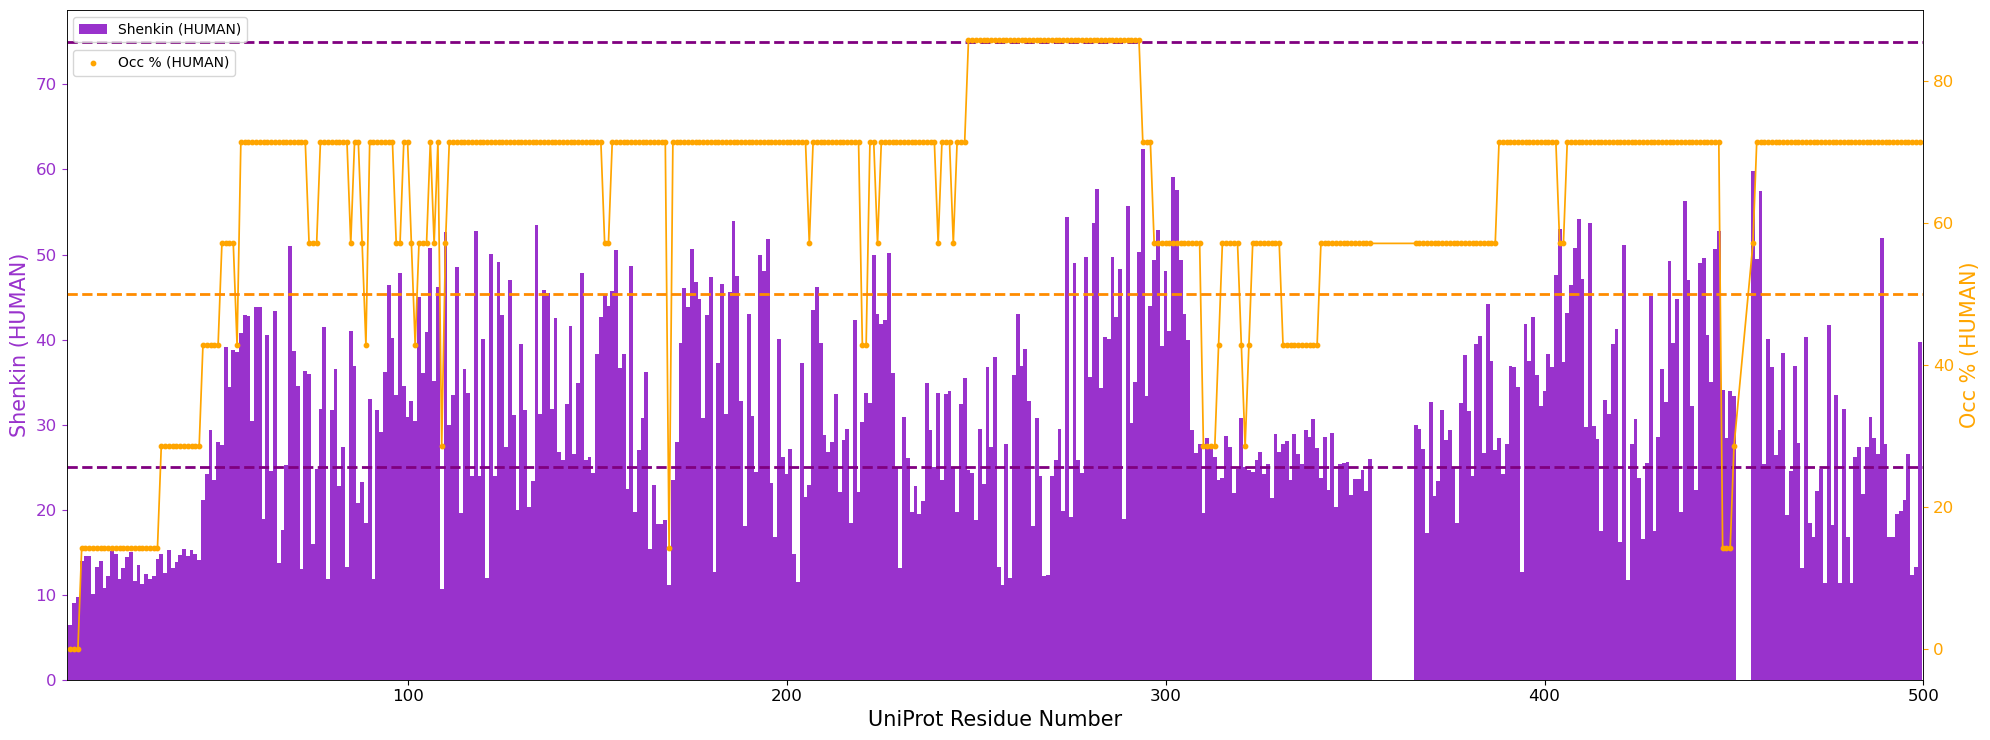

In [24]:
# Create the figure and the first axis (ax1)

plt.rcParams.update({"axes.linewidth": 0.5})

fig, ax1 = plt.subplots(figsize=(20, 7.5))

# Plot a barplot on ax1
ax1.bar(results_df['UniProt_ResNum'], results_df['human_shenkin'], color='darkorchid', label='Shenkin (HUMAN)', width = 1)

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_xlabel('UniProt Residue Number', fontsize = 15)
ax1.set_ylabel('Shenkin (HUMAN)', color='darkorchid', fontsize = 15)
ax1.tick_params('x', colors='k', labelsize=12)
ax1.tick_params('y', colors='darkorchid', labelsize=12)
ax1.axhline(y = 25, linestyle = '--', c = 'purple')
ax1.axhline(y = 75, linestyle = '--', c = 'purple')
# Create the second axis (ax2) based on the first axis (ax1)
ax2 = ax1.twinx()

# Plot a scatterplot + lineplot on ax2
ax2.scatter(results_df['UniProt_ResNum'], results_df['human_occ_pct'], color='orange', marker='o', label='Occ % (HUMAN)', s = 10)
ax2.plot(results_df['UniProt_ResNum'], results_df['human_occ_pct'], color='orange', linewidth = 1.25)

# Make the y-axis label, ticks and tick labels match the line color.
ax2.set_ylabel('Occ % (HUMAN)', color='orange', fontsize = 15)
ax2.tick_params('y', colors='orange', labelsize=12)
ax2.axhline(y = 50, linestyle = '--', c = 'darkorange')

plt.xlim(results_df.UniProt_ResNum.min() - 1, results_df.UniProt_ResNum.max() + 1)

# Create legends
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.95))

# Show the plot
fig.tight_layout()
plt.show()


### Binding sites analysis

In [25]:
binding_ress_df = results_df.query('binding_sites == binding_sites').copy()

In [26]:
binding_ress_df = binding_ress_df.explode("binding_sites")

In [27]:
un_bss = sorted(binding_ress_df.binding_sites.unique().tolist())

In [28]:
results_df.columns

Index(['UniProt_ResNum', 'alignment_column', 'shenkin', 'occ', 'gaps',
       'occ_pct', 'gaps_pct', 'rel_norm_shenkin', 'abs_norm_shenkin',
       'human_shenkin', 'human_occ', 'human_gaps', 'human_occ_pct',
       'human_gaps_pct', 'variants', 'oddsratio', 'pvalue', 'se_OR', 'AA',
       'RSA', 'SS', 'binding_sites'],
      dtype='object')

In [29]:
sizes, occs, shenks, hum_occs, hum_shenks, ORs, RSAs = [[], [], [], [], [], [], []]
for bs in un_bss:  
    bs_df = binding_ress_df.query('binding_sites == @bs')
    sizes.append(len(bs_df))
    occs.append(bs_df.occ_pct.mean())
    shenks.append(bs_df.abs_norm_shenkin.mean())
    hum_occs.append(bs_df.human_occ_pct.mean())
    hum_shenks.append(bs_df.human_shenkin.mean())
    ORs.append(bs_df.oddsratio.mean())
    RSAs.append(bs_df.RSA.mean())

bss_df = pd.DataFrame(
    zip(un_bss, sizes, occs, shenks, hum_occs, hum_shenks, ORs, RSAs),
    columns=[
        "bs_id", "size", "occ_pct", "abs_norm_shenk", "human_occ_pct",
        "human_shenk", "OR", "RSA"
    ]
).round(2)
bss_df["color"] = bss_df.bs_id.map(sample_colors_dict)

In [30]:
bss_df

,bs_id,size,occ_pct,abs_norm_shenk,human_occ_pct,human_shenk,OR,RSA,color
0,0,23,67.85,14.38,77.02,22.39,0.83,17.42,#e6194b
1,1,16,64.49,18.37,73.22,26.94,0.72,5.78,#3cb44b


### Average Missense enrichment vs divergence per site

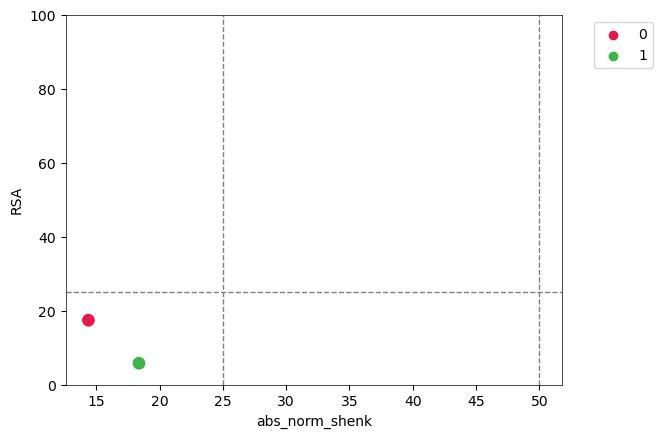

In [31]:
sns.scatterplot(
    data = bss_df,
    x = "abs_norm_shenk",
    y = "RSA",
    hue = "bs_id",
    palette = bss_df["color"].tolist(),
    s = 100
)
#plt.yscale('log')
plt.axhline(y=25, linestyle = "--", lw = 1, c = "gray")
plt.axvline(x = 25, linestyle = "--", lw = 1, c = "gray")
plt.axvline(x = 50, linestyle = "--", lw = 1, c = "gray")

plt.ylim(0,100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [32]:
print(binding_ress_df.oddsratio.min())
print(binding_ress_df.oddsratio.max())

print(binding_ress_df.abs_norm_shenkin.min())
print(binding_ress_df.abs_norm_shenkin.max())

0.0
2.33
4.52
39.62


In [33]:
binding_ress_df.query('oddsratio == 0')

,UniProt_ResNum,alignment_column,shenkin,occ,gaps,occ_pct,gaps_pct,rel_norm_shenkin,abs_norm_shenkin,human_shenkin,...,human_occ_pct,human_gaps_pct,variants,oddsratio,pvalue,se_OR,AA,RSA,SS,binding_sites
378,400,1025,33.90,1425,1011,58.50,41.50,49.46,24.47,33.90,...,71.43,28.57,0,0.0,0.17,2.9,L,7.98,T,1
400,422,1088,11.68,1616,820,66.34,33.66,10.07,4.98,11.68,...,71.43,28.57,0,0.0,0.17,2.9,E,41.85,E,0
403,425,1091,23.73,1617,819,66.38,33.62,31.43,15.55,23.73,...,71.43,28.57,0,0.0,0.17,2.9,T,10.18,E,0
403,425,1091,23.73,1617,819,66.38,33.62,31.43,15.55,23.73,...,71.43,28.57,0,0.0,0.17,2.9,T,10.18,E,1
465,491,1181,16.81,1612,824,66.17,33.83,19.16,9.48,16.81,...,71.43,28.57,0,0.0,0.17,2.9,I,14.09,H,0


### Inspecting binding site ligand membership

In [34]:
bs_ligs_dict = {bs_id: sorted(bs_rows.lig_name.tolist()) for bs_id, bs_rows in bs_def_df.groupby("binding_site")}

In [35]:
for k, v in bs_ligs_dict.items():
    print("{}: {}".format(k, v))

0: ['LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG', 'LIG']
1: ['LIG', 'LIG']


In [36]:
binding_ress_df.query('binding_sites == 6 & abs_norm_shenkin > 50 & oddsratio < 1')

,UniProt_ResNum,alignment_column,shenkin,occ,gaps,occ_pct,gaps_pct,rel_norm_shenkin,abs_norm_shenkin,human_shenkin,...,human_occ_pct,human_gaps_pct,variants,oddsratio,pvalue,se_OR,AA,RSA,SS,binding_sites


In [37]:
binding_ress_df.query('binding_sites == 12 & pvalue < 0.1')

,UniProt_ResNum,alignment_column,shenkin,occ,gaps,occ_pct,gaps_pct,rel_norm_shenkin,abs_norm_shenkin,human_shenkin,...,human_occ_pct,human_gaps_pct,variants,oddsratio,pvalue,se_OR,AA,RSA,SS,binding_sites


### Plotting Missense enrichment vs Divergence for each site

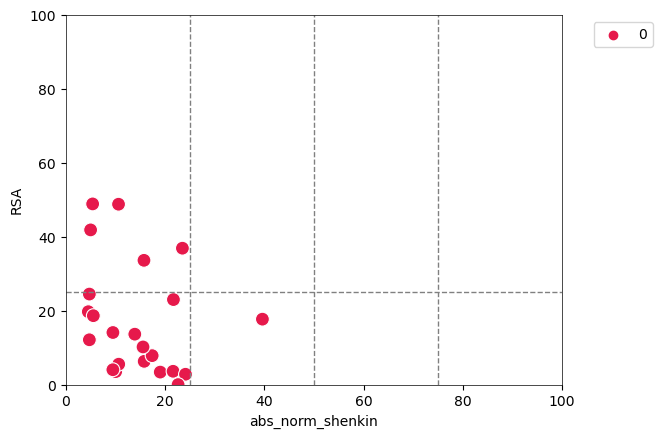

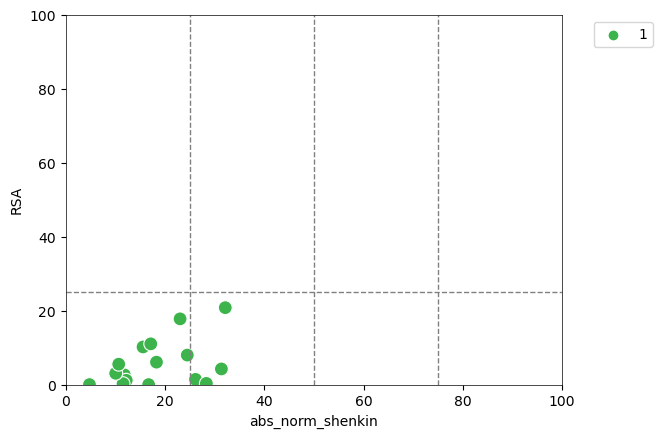

In [38]:
for bs in un_bss:  
    bs_df = binding_ress_df.query('binding_sites == @bs')
    sns.scatterplot(
        data = bs_df,
        x = "abs_norm_shenkin",
        y = "RSA",
        hue = "binding_sites",
        palette = [sample_colors[bs]],
        s = 100
    )
    #print([sample_colors[bs] for i in range(len(bs_df))])
    #plt.yscale('log')
    plt.axhline(y=25, linestyle = "--", lw = 1, c = "gray")
    plt.axvline(x = 25, linestyle = "--", lw = 1, c = "gray")
    plt.axvline(x = 50, linestyle = "--", lw = 1, c = "gray")
    plt.axvline(x = 75, linestyle = "--", lw = 1, c = "gray")
    
    plt.xlim(0,100)
    plt.ylim(0,100)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

## FUNCTIONAL SCORE PER SITE

In [39]:
rsa_profs_dict

{0: [19.72,
  36.9,
  48.8,
  23.0,
  33.62,
  48.88,
  18.64,
  6.29,
  7.83,
  3.51,
  17.7,
  41.85,
  3.38,
  3.6,
  10.18,
  5.52,
  2.8,
  12.12,
  0.0,
  4.02,
  24.49,
  13.64,
  14.09,
  11.92],
 1: [6.07,
  2.62,
  0.0,
  1.17,
  0.25,
  20.81,
  1.41,
  17.78,
  7.98,
  0.32,
  10.18,
  11.02,
  3.05,
  0.0,
  4.23,
  5.52]}

In [40]:
max_len = max([len(v) for v in rsa_profs_dict.values()])
bs_vectors = []
bs_vectors_dict = {}
for bs_id, rsa_sig in rsa_profs_dict.items():
    rsa_sig_len = len(rsa_sig)
    rsa_range_prop = [0 for i in range(10)] # now let us change to 10
    for rsa in rsa_sig:
        prop_i = int(rsa/10) # 10 RSA BINS: b1 = [0,10), b2 = [10, 20), ... b10 = [90, MAX)
        if prop_i > 9: # if greater than 100, put in 10th bin
            prop_i = 9
        #print(prop_i)
        rsa_range_prop[prop_i] += 1
    rsa_range_prop = [round(i/rsa_sig_len, 3) for i in rsa_range_prop]
    rsa_range_prop.insert(0, rsa_sig_len/max_len) # ADDING BINDING SITE SIZE RELATIVE TO MAX SITE SIZE (IN THIS CASE 40)
    bs_vectors.append(rsa_range_prop)
    bs_vectors_dict[bs_id] = rsa_range_prop
    
vector_df = pd.DataFrame(bs_vectors, index = list(rsa_profs_dict.keys())) # obtaining RSA vectors, which are the 11-element features used for the machine learning

In [41]:
vector_df

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.375,0.333,0.083,0.083,0.125,0.0,0.0,0.0,0.0,0.0
1,0.666667,0.750,0.188,0.062,0.000,0.000,0.0,0.0,0.0,0.0,0.0


In [42]:
import keras

2023-09-11 17:15:17.584947: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [43]:
model_path = "/homes/2394007/JSU_LIGYSIS/ANN_results/diff_seeds/85406/models/85406_4_model_epoch_75_train_acc_0.88.h5"
final_model = keras.models.load_model(model_path)
final_preds = final_model.predict(x = vector_df, batch_size = 27, verbose = 0)
rounded_predictions = np.argmax(final_preds, axis = -1)

2023-09-11 17:15:20.213747: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [44]:
prop_func_dict = {0:0.58, 1: 0.18, 2:0.05, 3:0.04}

In [45]:
site_func_score_dict = {}
for i, el in enumerate(final_preds):
    site_func_score_dict[i] = 0
    for o, e in enumerate(el):
        site_func_score_dict[i] += e*prop_func_dict[o]
    #print([round(e,6) for e in el])
    
site_func_score_dict = {k: round(v, 4) for k, v in site_func_score_dict.items()}

In [46]:
site_func_score_dict

{0: 0.5799, 1: 0.58}

In [47]:
bss_df["rsa_cluster"] = [el + 1 for el in list(rounded_predictions)]
bss_df["func_score"] = bss_df.bs_id.map(site_func_score_dict)

In [48]:
bss_df

,bs_id,size,occ_pct,abs_norm_shenk,human_occ_pct,human_shenk,OR,RSA,color,rsa_cluster,func_score
0,0,23,67.85,14.38,77.02,22.39,0.83,17.42,#e6194b,1,0.5799
1,1,16,64.49,18.37,73.22,26.94,0.72,5.78,#3cb44b,1,0.5800
